In [419]:
import pandas as pd
import numpy as np

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [420]:
### 1.1 ###
l = np.arange(1, 11)

out_file = "data/data_int.txt"
with open(out_file, 'w') as outfile:
    outfile.write(str(l) + '\n')

!cat data/data_int.txt

[ 1  2  3  4  5  6  7  8  9 10]


In [421]:
### 1.2 ###
m = np.linspace(1, 25, 25, 'float')
m = m.reshape(5, 5)


out_file = "data/data_float.txt"
with open(out_file, 'w') as outfile:
    for i in range(len(m[:, 0])):
        for j in range(len(m[0, :])):
            outfile.write(str(m[i, j]))
            if j < len(m[0, :])-1:
                outfile.write(", ")
        outfile.write("\n")

!cat data/data_float.txt

1.0, 2.0, 3.0, 4.0, 5.0
6.0, 7.0, 8.0, 9.0, 10.0
11.0, 12.0, 13.0, 14.0, 15.0
16.0, 17.0, 18.0, 19.0, 20.0
21.0, 22.0, 23.0, 24.0, 25.0


In [422]:
### 1.3 ###
import csv

with open("data/output.csv", "w") as f:
    writer = csv.writer(f)
    with open("data/data_float.txt", "r") as data_file:
        for line in csv.reader(data_file, delimiter = ','):
            writer.writerow(line)

output = pd.read_csv("data/data_float.txt", delimiter = ",", header = None)
output

,0,1,2,3,4
0,1.0,2.0,3.0,4.0,5.0
1,6.0,7.0,8.0,9.0,10.0
2,11.0,12.0,13.0,14.0,15.0
3,16.0,17.0,18.0,19.0,20.0
4,21.0,22.0,23.0,24.0,25.0


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [423]:
#!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json -P data/

In [424]:
import json
data = json.load(open("data/user_data.json"))

data_filtered = []
for i in range(len(data)):
    if data[i]["CreditCardType"] == "American Express":
        data_filtered.append(data[i])

headers = ["ID", "JobTitle", "EmailAddress", "FirstNameLastName", "CreditCard", "CreditCardType"] # set a headers string
line = [] # initialize line to write
with open("data/user_data_filtered.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(headers) # write the headers first
    for i in range(len(data_filtered)):
        for el in headers:
            line.append(data_filtered[i][el])
        writer.writerow(line) # write row (i) from data_filtered
        line = [] # clear variable line for reading row (i+1) from data_filtered

output = pd.read_csv("data/user_data_filtered.csv", delimiter = ",")
output

,ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType
0,2,Investment Advisor,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,7083-8766-0251-2345,American Express
1,12,Retail Trainee,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,3657-0088-0820-5247,American Express
2,28,Project Manager,Russel_Graves1378@extex.org,Russel Graves,6718-4818-8011-6024,American Express
3,39,Stockbroker,Leanne_Newton1268@typill.biz,Leanne Newton,5438-0816-4166-4847,American Express
4,57,Budget Analyst,Tony_Giles1960@iatim.tech,Tony Giles,8130-3425-7573-7745,American Express
5,62,CNC Operator,Owen_Allcott5125@bauros.biz,Owen Allcott,4156-0107-7210-2630,American Express
6,68,Project Manager,Liam_Lynn3280@kideod.biz,Liam Lynn,7152-3247-6053-2233,American Express
7,74,Dentist,Regina_Woodcock5820@yahoo.com,Regina Woodcock,0208-1753-3870-8002,American Express
8,81,HR Specialist,Carter_Wallace9614@atink.com,Carter Wallace,4256-7201-6717-4322,American Express
9,92,Staffing Consultant,Maia_Stark2797@jiman.org,Maia Stark,3851-1403-1734-6321,American Express


3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [425]:
### 3.1 ###
# downloading file
#!wget https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv -P data/

In [426]:
### 3.2 ###
data = pd.read_csv("data/mushrooms_categorized.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [427]:
### 3.3 ###
data_modified = data.groupby("class").mean()
data_modified

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [428]:
### 3.4 ###
data_modified.to_json("data/mushrooms_categorized_meanFeatures.json", orient = "records", compression = None, index=True, indent = 10)
!cat data/mushrooms_categorized_meanFeatures.json


[
          {
                    "cap-shape":3.2661596958,
                    "cap-surface":1.6159695817,
                    "cap-color":4.5817490494,
                    "bruises":0.6539923954,
                    "odor":4.3346007605,
                    "gill-attachment":0.9543726236,
                    "gill-spacing":0.2851711027,
                    "gill-size":0.0684410646,
                    "gill-color":6.6226235741,
                    "stalk-shape":0.6159695817,
                    "stalk-root":1.4980988593,
                    "stalk-surface-above-ring":1.7756653992,
                    "stalk-surface-below-ring":1.7984790875,
                    "stalk-color-above-ring":6.0988593156,
                    "stalk-color-below-ring":6.0646387833,
                    "veil-type":0.0,
                    "veil-color":1.9315589354,
                    "ring-number":1.1254752852,
                    "ring-type":3.0076045627,
                    "spore-print-color":3.2015209125,


4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [429]:
#!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat -P data/

In [430]:
with open('data/credit_card.dat', 'rb') as f:
    cards = ""
    outf = f.read()
    for i in outf:
        cards += chr(i)


cards = cards.replace("100000", "") # eliminating blank space
cards = cards.split("\n") # separating by lines


cards_numbers_dec = [] # initializing the final list of credit cards
for i in range(len(cards)):
    cards[i] = cards[i][:-4] # eliminating the final 1010 sequence (newline)
    for j in range(0, len(cards[i]), 6):
        cards_numbers_dec.append(int(cards[i][j+2:j+6], 2))

print("\nA total of %.0f credit cards have been decyphered to decimal: " % (len(cards_numbers_dec)/16))
for i in range(0, len(cards_numbers_dec), 16):
    print(str(cards_numbers_dec[i]) + str(cards_numbers_dec[i+1]) + str(cards_numbers_dec[i+2]) + str(cards_numbers_dec[i+3]) + "\t" + str(cards_numbers_dec[i+4]) + str(cards_numbers_dec[i+5]) + str(cards_numbers_dec[i+6]) + str(cards_numbers_dec[i+7]) + "\t" + str(cards_numbers_dec[i+8]) + str(cards_numbers_dec[i+9]) + str(cards_numbers_dec[i+10]) + str(cards_numbers_dec[i+11]) + "\t" + str(cards_numbers_dec[i+12]) + str(cards_numbers_dec[i+13]) + str(cards_numbers_dec[i+14]) + str(cards_numbers_dec[i+15]))


A total of 50 credit cards have been decyphered to decimal: 
7648	5673	3775	2271
3257	8247	3354	2266
2722	0001	4011	6652
0661	3063	3742	3150
0432	1608	1462	4742
5827	2027	8785	7303
5774	8528	2087	1117
8140	1210	6352	2845
5764	1133	7301	7100
6456	1737	4126	6726
1228	8631	7382	0000
7051	0160	5374	3166
0618	3587	1630	6376
1545	5454	7444	5636
6735	3116	3202	6834
7287	5011	1547	8413
7033	2607	3328	4200
2568	5244	1874	5024
1684	2253	7570	7118
0672	2576	0575	6631
6332	8353	8787	1340
1813	3361	1175	4211
2477	6450	8840	2368
5512	3505	2563	1326
3083	7882	0621	0025
4521	5148	8045	0334
7563	3654	8713	5787
8324	2664	0476	5561
0565	2504	7168	3510
5107	5507	1767	0738
2462	1821	2448	1443
2788	0638	6861	6554
5851	5873	5474	0547
0670	1004	4013	2655
5874	5506	3048	0806
2805	5401	8462	1260
5083	8406	6310	1862
1076	1445	3013	2266
8440	4804	4844	5277
4758	6141	0686	1387
7586	0675	0315	2568
2544	1258	7432	5165
3474	5023	4434	5626
1410	0270	0434	5086
7315	4446	1104	4215
0224	7742	8300	0266
0170	2700	3145	064

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

In [431]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

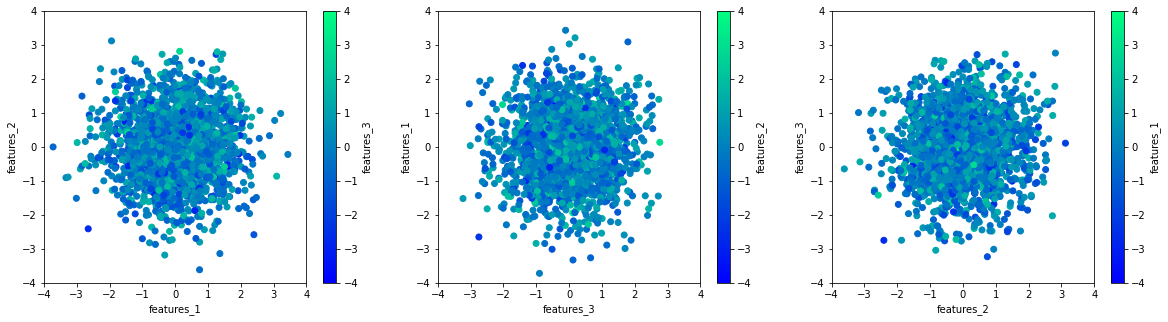

In [455]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]
cm = plt.cm.get_cmap('winter')

data = pd.read_csv("data/regression_generated.csv")

fig, ax = plt.subplots(1,3); fig.patch.set_facecolor('xkcd:white')

im1 = ax[0].scatter(data["features_1"], data["features_2"], c = data["features_3"], cmap = cm, vmin = -4, vmax = 4)
im2 = ax[1].scatter(data["features_3"], data["features_1"], c = data["features_2"], cmap = cm, vmin = -4, vmax = 4)
im3 = ax[2].scatter(data["features_2"], data["features_3"], c = data["features_1"], cmap = cm, vmin = -4, vmax = 4)

ax[0].set_xlabel("features_1"); ax[0].set_ylabel("features_2")
ax[1].set_xlabel("features_3"); ax[1].set_ylabel("features_1")
ax[2].set_xlabel("features_2"); ax[2].set_ylabel("features_3")

cbar1 = fig.colorbar(im1, ax = ax[0]); cbar1.set_label("features_3")
cbar2 = fig.colorbar(im2, ax = ax[1]); cbar2.set_label("features_2")
cbar3 = fig.colorbar(im3, ax = ax[2]); cbar3.set_label("features_1")

for i in range(len(ax)):
    ax[i].set_xlim(-4, 4); ax[i].set_ylim(-4, 4)
